# Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

# The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

__We need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.__

# Importing required libraries for starting our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("train_agriculture.xlsx")

In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:

df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


# Data Analysis and Visualisation

Lets start with identifing null values and droping the column (ID )as it will not help us in prediction.

In [6]:
df.drop('ID', axis=1, inplace = True)
df.info()
print("Now we can see there is no ID coloumn in Data, we have dropped it")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4157 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB
Now we can see there is no ID coloumn in Data, we have dropped it


In [7]:
df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

__Observation__
Only one column Number_Weeks_Used have missing values. Lets find out how to handel but before which lets see the correlation of the dataset.

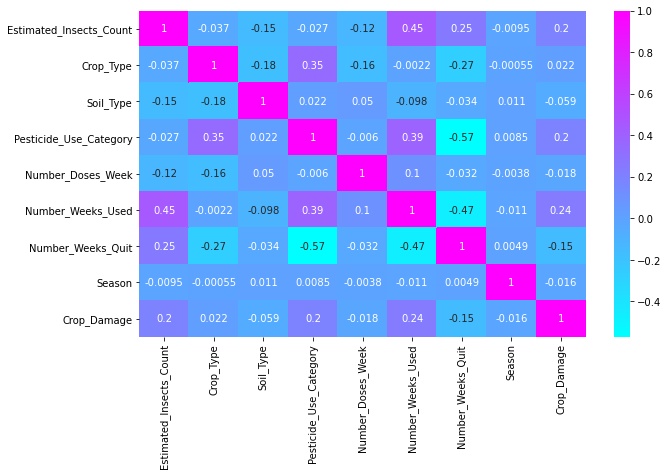

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot = True, cmap = "cool")
plt.show()


__Few observation from above correlation__

Estimated_Insects_Count    0.45
Crop_Type                 -0.0022
Soil_Type                 -0.098
Pesticide_Use_Category     0.39
Number_Doses_Week          0.1
Number_Weeks_Quit         -0.47
Season                    -0.011
Crop_Damage                0.24

*We can see Number_Weeks_Quit -0.467 has the higest correlation with 'Number_Weeks_Used' we will split the data according to the unique values of Number_Weeks_Quit and fill null values in 'Number_Weeks_Used'*


In [9]:
list= []

for i in df.Number_Weeks_Quit.unique():
    list.append(i)

for i in range(0,len(list)):
    exec(f'NWQ_{i} = df.loc[df.Number_Weeks_Quit=={list[i]}]')
    exec(f"NWQ_{i}.Number_Weeks_Used.fillna(NWQ_{i}['Number_Weeks_Used'].mode()[0], inplace = True)")

DF = pd.concat([NWQ_0,NWQ_1,NWQ_2,NWQ_3,NWQ_4,NWQ_5,NWQ_6,NWQ_7,NWQ_8,NWQ_9,NWQ_10,NWQ_11,NWQ_12,NWQ_13,NWQ_14,
                NWQ_15,NWQ_16,NWQ_17,NWQ_18,NWQ_19,NWQ_20,NWQ_21,NWQ_22,NWQ_23,NWQ_24,NWQ_25,NWQ_26,NWQ_27,
                NWQ_28,NWQ_29,NWQ_30,NWQ_31,NWQ_32,NWQ_33,NWQ_34,NWQ_35,NWQ_36,NWQ_37,NWQ_38,NWQ_39,NWQ_40,
                NWQ_41,NWQ_42,NWQ_43,NWQ_44,NWQ_45,NWQ_46])
df= DF.sort_index()
DF.isna().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [10]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,29.073712,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.374977,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,29.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,39.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


From above we can see that Mean is greater than 50% and also difference between 75% and Max is larger which means there are outliers and skewness present in the data.

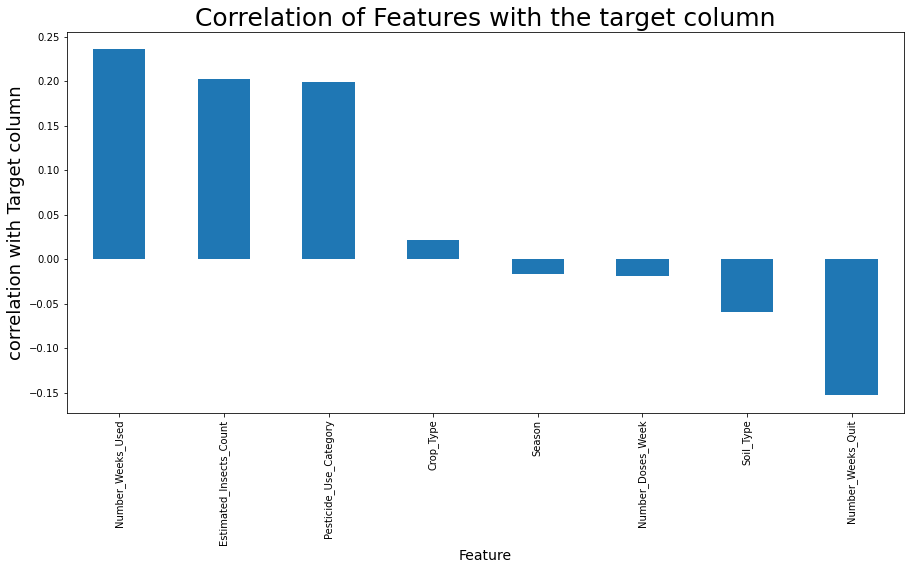

In [11]:
plt.figure(figsize=(15,7))
df.corr()["Crop_Damage"].sort_values(ascending=False).drop(["Crop_Damage"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(df.corr()["Crop_Damage"].sort_values(ascending=False)).drop(["Crop_Damage"])

__Observation__

- Number_Weeks_Used is 0.23 correlated with Crop_Damage, which is the good number of weak pesticide used will give healthy crops at 23%
- Number_Weeks_Quit is -0.15 corelated with Crop_damage, which is Number_Weeks_Quit without using pesticide will give Damaged crop at 15%.

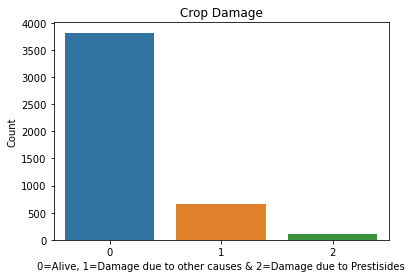

In [12]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Damage',data=df)
plt.title('Crop Damage')
plt.xlabel('0=Alive, 1=Damage due to other causes & 2=Damage due to Prestisides')
plt.ylabel('Count')
plt.show()

__Observation__

Alive crops are highest in count

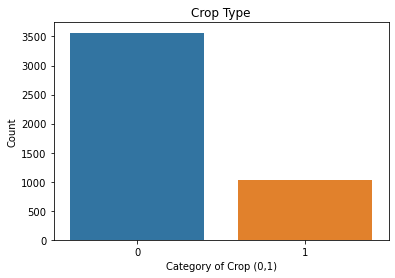

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [13]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Crop_Type',data=df)
plt.title('Crop Type')
plt.xlabel('Category of Crop (0,1)')
plt.ylabel('Count')
plt.show()

df['Crop_Damage'].value_counts()


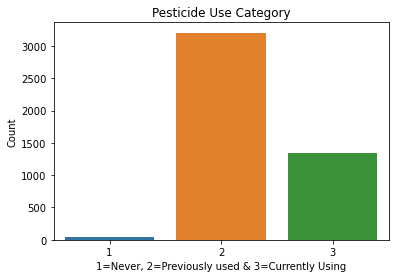

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [14]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Pesticide_Use_Category',data=df)
plt.title('Pesticide Use Category')
plt.xlabel('1=Never, 2=Previously used & 3=Currently Using')
plt.ylabel('Count')
plt.show()

df['Pesticide_Use_Category'].value_counts()

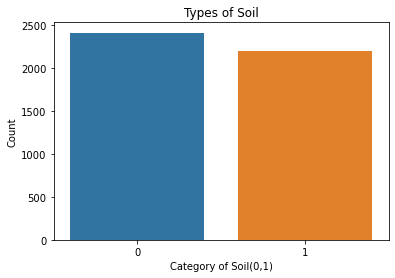

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [15]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Soil_Type',data=df)
plt.title('Types of Soil')
plt.xlabel('Category of Soil(0,1)')
plt.ylabel('Count')
plt.show()

df['Soil_Type'].value_counts()

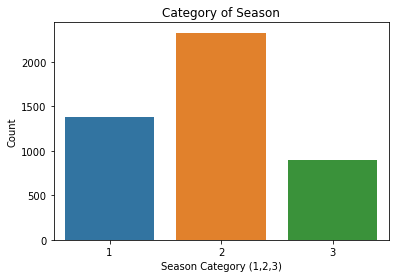

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [16]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Season',data=df)
plt.title('Category of Season')
plt.xlabel('Season Category (1,2,3)')
plt.ylabel('Count')
plt.show()

df['Season'].value_counts()

<Figure size 576x288 with 0 Axes>

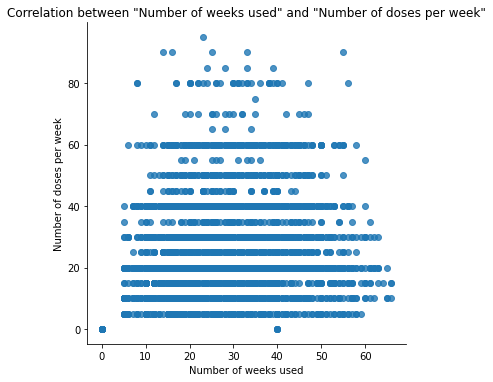

In [17]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Used',y='Number_Doses_Week',fit_reg=False,data=df)
plt.xlabel('Number of weeks used')
plt.title('Correlation between "Number of weeks used" and "Number of doses per week"')
plt.ylabel('Number of doses per week')
plt.show()

<Figure size 576x288 with 0 Axes>

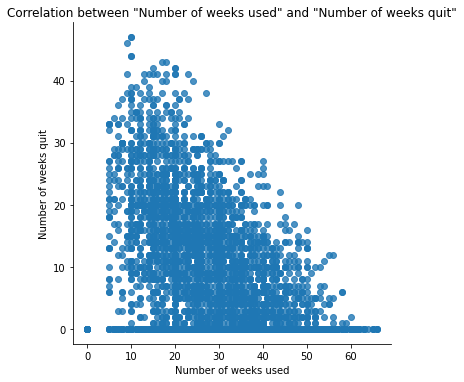

In [18]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Used',y='Number_Weeks_Quit',fit_reg=False,data=df)
plt.xlabel('Number of weeks used')
plt.title('Correlation between "Number of weeks used" and "Number of weeks quit"')
plt.ylabel('Number of weeks quit')
plt.show()

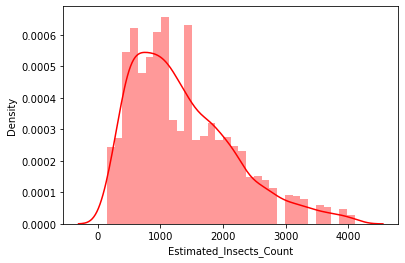

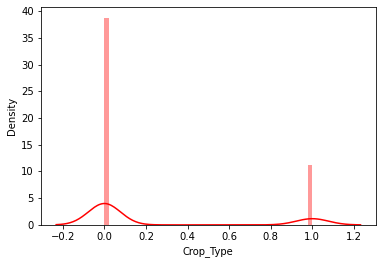

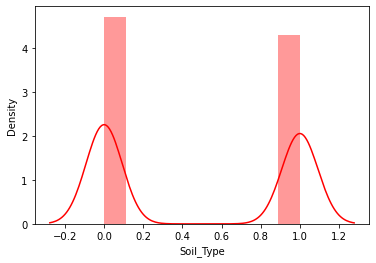

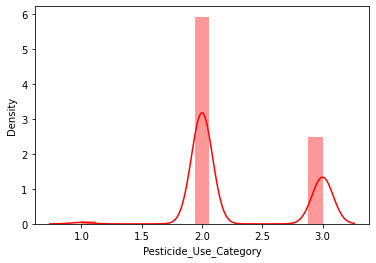

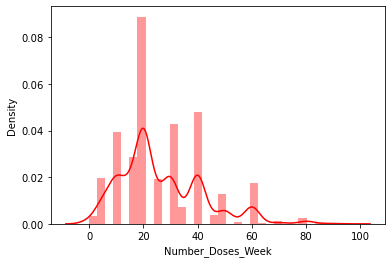

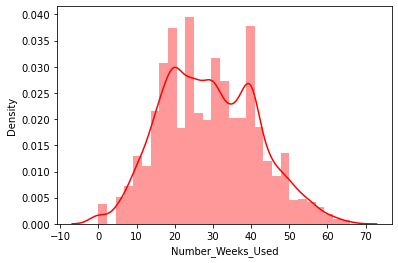

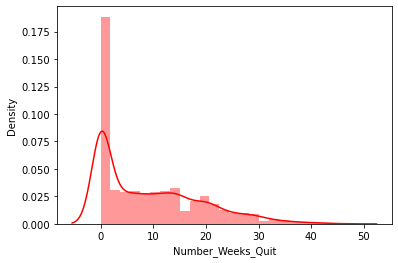

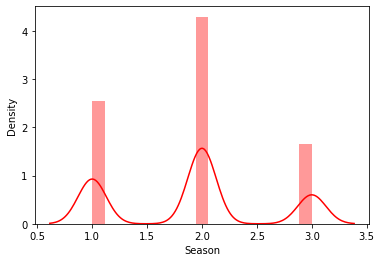

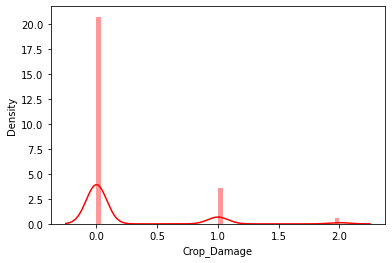

In [19]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [20]:
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.212783
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

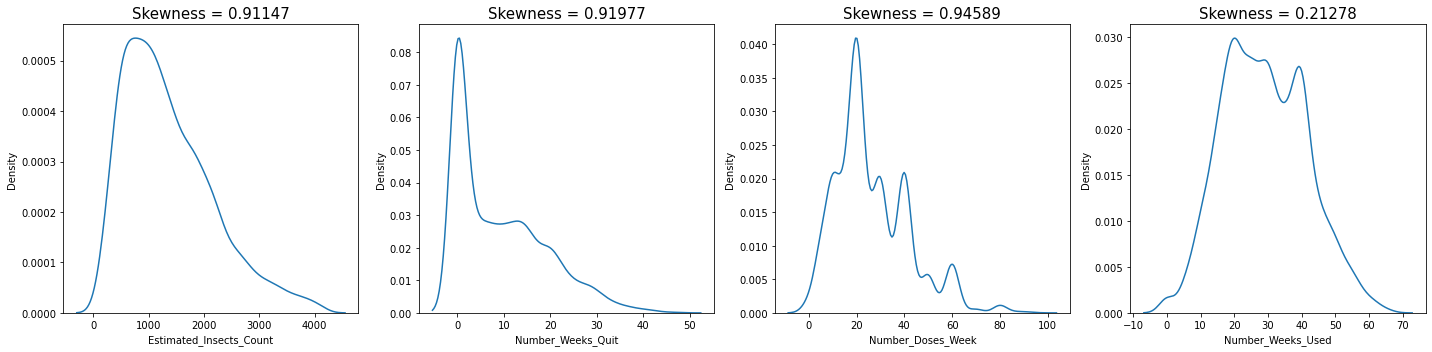

In [21]:
plt.figure(figsize=(20,5))
collist = ["Estimated_Insects_Count","Number_Weeks_Quit","Number_Doses_Week","Number_Weeks_Used"]
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)         
    sns.kdeplot(df[collist[i]])
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

# Skewness removal:

Data has too much skewness but removing all will deform the data.We will use "yeojohnson method" to correct the skewness.

In [22]:
skewness=[]
colist = df.columns.values
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": colist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n",
      skew_postive_row,"\n\nnegative Skewed data:\n", skew_negative_row)





Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['Crop_Damage', 'Crop_Type', 'Number_Doses_Week', 'Number_Weeks_Quit', 'Estimated_Insects_Count', 'Pesticide_Use_Category'] 

negative Skewed data:
 []


BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


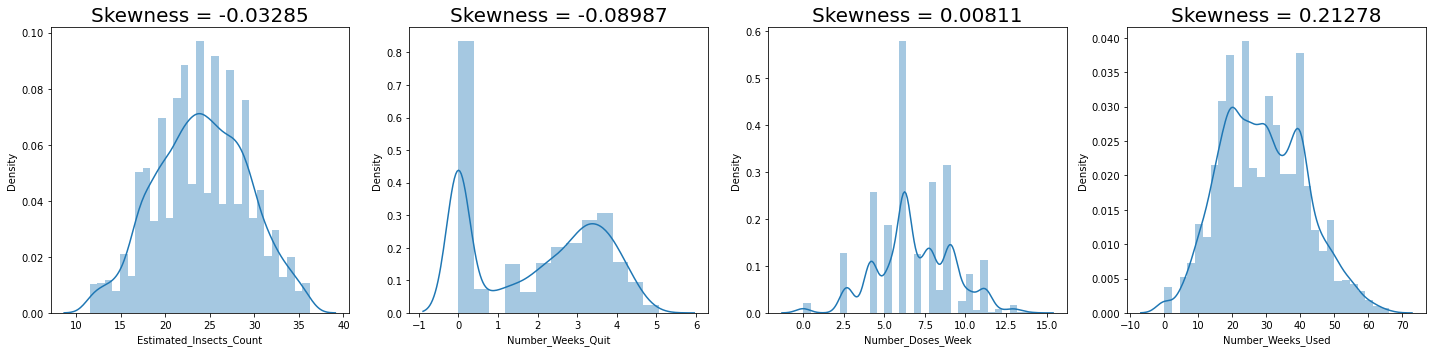

In [23]:
data=df

from scipy.stats import yeojohnson

skew = [ "Estimated_Insects_Count","Number_Weeks_Quit","Number_Doses_Week"] 

for i in skew:
    data[i]= yeojohnson(DF[i])[0]
    
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(20,5))
for i in range (0, len(collist)):
    plt.subplot(1,4,i+1)
    plt.title(f"Skewness = {round(data[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(data[collist[i]])
    plt.tight_layout()

# Identify the outliers and remove them.

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.352273x0.130172)
Crop_Type                  AxesSubplot(0.547727,0.749828;0.352273x0.130172)
Soil_Type                     AxesSubplot(0.125,0.593621;0.352273x0.130172)
Pesticide_Use_Category     AxesSubplot(0.547727,0.593621;0.352273x0.130172)
Number_Doses_Week             AxesSubplot(0.125,0.437414;0.352273x0.130172)
Number_Weeks_Used          AxesSubplot(0.547727,0.437414;0.352273x0.130172)
Number_Weeks_Quit             AxesSubplot(0.125,0.281207;0.352273x0.130172)
Season                     AxesSubplot(0.547727,0.281207;0.352273x0.130172)
Crop_Damage                      AxesSubplot(0.125,0.125;0.352273x0.130172)
dtype: object

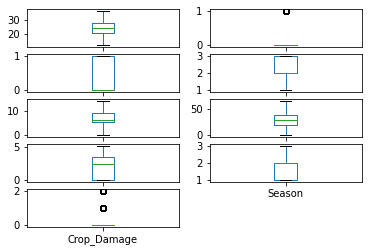

In [24]:
df.plot(kind='box',subplots=True,layout=(5,2))

__Observation__

To remove the outliwers from the dataset we r using z-score threshold value

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.24476217, 1.85681868, 0.95429408, ..., 1.24022612, 1.28702725,
        0.42765624],
       [2.14682668, 1.85681868, 0.95429408, ..., 1.24022612, 0.15207762,
        1.77233374],
       [1.94644284, 1.85681868, 0.95429408, ..., 1.24022612, 0.15207762,
        1.77233374],
       ...,
       [1.00407349, 0.53855555, 1.04789501, ..., 1.69720004, 0.15207762,
        0.42765624],
       [2.23469653, 0.53855555, 1.04789501, ..., 1.82037081, 0.15207762,
        0.42765624],
       [2.34821984, 0.53855555, 1.04789501, ..., 1.82037081, 0.15207762,
        0.42765624]])

In [26]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,  103,  112,  149,  165,  166,  167,  179,  186,
        197,  207,  222,  223,  242,  248,  264,  265,  290,  296,  305,
        316,  351,  355,  361,  374,  377,  453,  458,  466,  480,  510,
        517,  522,  557,  595,  612,  634,  693,  819,  944,  980, 1067,
       1178, 1327, 1339, 1340, 1737, 1807, 2043, 2139, 2170, 2171, 2237,
       2489, 2585, 2590, 2663, 2671, 2696, 2710, 2716, 2723, 2767, 2792,
       2796, 2797, 2804, 2806, 2814, 2828, 2829, 2834, 2841, 2842, 2851,
       2860, 2861, 2870, 2884, 2888, 2912, 2915, 2917, 2921, 2923, 3015,
       3045, 3058, 3086, 3107, 3126, 3183, 3189, 3206, 3248, 3628, 3629,
       3657, 3686, 3716, 3717, 3718, 3740, 3796, 3850, 3851, 3935, 4091,
       4155, 4277, 4278, 4378, 4545, 4570], dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8

In [27]:
df.shape

(4599, 9)

In [28]:
df=df[(z<3).all(axis=1)]
df.shape

(4483, 9)

__Observation:__

- 116 columns have been deleted after removing the outliers
- The percentage of data loss 2.5%
- the Loss of data is very minimal we will eliminate outliers and take the remaining data for analysis

In [29]:
x=df.drop('Crop_Damage',axis=1)
y=df['Crop_Damage']
x.shape, y.shape

((4483, 8), (4483,))

In [30]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [31]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('===================================================================================')
    print('\n')

Accuracy score of LogisticRegression() is:
0.8539576365663322
[[764   0]
 [131   2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       764
           1       1.00      0.02      0.03       133

    accuracy                           0.85       897
   macro avg       0.93      0.51      0.48       897
weighted avg       0.88      0.85      0.79       897



Accuracy score of GaussianNB() is:
0.8439241917502787
[[740  24]
 [116  17]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       764
           1       0.41      0.13      0.20       133

    accuracy                           0.84       897
   macro avg       0.64      0.55      0.55       897
weighted avg       0.80      0.84      0.81       897



Accuracy score of SVC() is:
0.855072463768116
[[763   1]
 [129   4]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       764
  

In [32]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('model:',m)
    print('score:',score)
    print('Mean score',score.mean())
    print('standard deviation:',score.std())
    print('===================================================================================')
    print('\n')

model: LogisticRegression()
score: [0.74832962 0.85077951 0.85077951 0.85267857 0.85267857 0.85267857
 0.85267857 0.85267857 0.85267857 0.85044643]
Mean score 0.8416406498568246
standard deviation: 0.031116782577906073


model: GaussianNB()
score: [0.43875278 0.82182628 0.84855234 0.85267857 0.85267857 0.84375
 0.5        0.86830357 0.86607143 0.85044643]
Mean score 0.7743059974546611
standard deviation: 0.15354843844943075


model: SVC()
score: [0.27171492 0.72160356 0.78173719 0.85267857 0.85267857 0.83705357
 0.34821429 0.85267857 0.85267857 0.85044643]
Mean score 0.7221484250715877
standard deviation: 0.21073306485783938


model: DecisionTreeClassifier()
score: [0.15144766 0.5857461  0.56792873 0.32589286 0.57589286 0.70758929
 0.25892857 0.390625   0.24553571 0.85044643]
Mean score 0.46600332087177854
standard deviation: 0.21417449150055892


model: KNeighborsClassifier()
score: [0.34521158 0.63919822 0.67260579 0.81696429 0.85267857 0.74776786
 0.37723214 0.73660714 0.828125   0.

__Observation:__

- Logistic Regression and SVC is performing the best with 85% accuracy

In [33]:
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [34]:
lr=LogisticRegression(C=1,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8539576365663322
[[764   0]
 [131   2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       764
           1       1.00      0.02      0.03       133

    accuracy                           0.85       897
   macro avg       0.93      0.51      0.48       897
weighted avg       0.88      0.85      0.79       897



In [35]:
score=cross_val_score(lr,x,y,cv=5,scoring='accuracy')
print(score)
print('Mean:',score.mean())
print('Std:',score.std())

[0.80713489 0.85172798 0.85061315 0.85267857 0.8515625 ]
Mean: 0.8427434205287465
Std: 0.017816316167771754


In [ ]:
parameters={'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':range(42,60)}
sv=SVC()

clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

In [ ]:
sv=SVC(kernel='linear',C=1,random_state=42,probability=True)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

In [ ]:
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')
print(score)
print('Mean:',score.mean())
print('Std:',score.std())

In [ ]:
cm=confusion_matrix(y_test,predlr)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title('confusion Matrix of GaussianNB')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.show()

auc_score=roc_auc_score(y_test,predlr)
print(auc_score)

# Conclusion:

The above study helps to understand what are the factors that affects the quality of the Crops, how to use the pesticide to get a good quality of crops. Which season will give better yeild.

In [ ]:
# Saving This Logistic Regression
import joblib

# Save the model as a pickle in a file
joblib.dump(lr,'Hr_employee_Attrition_lr.pkl')